In [108]:
import numpy 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
train=pd.read_csv('../Dataset hackerearth/Loan_Price_Prediction/train_u6lujuX_CVtuZ9i.csv')
test=pd.read_csv('../Dataset hackerearth/Loan_Price_Prediction/test_Y3wMUE5_7gLdaTN.csv')

In [109]:
train.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


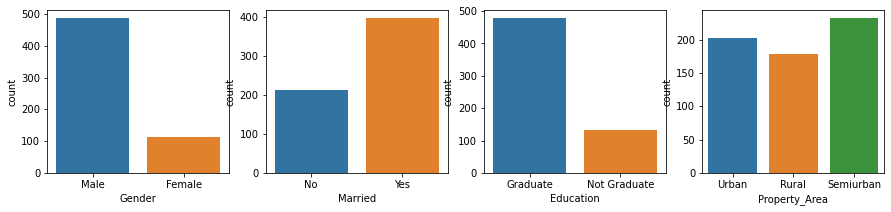

In [75]:
_,axs = plt.subplots(ncols=4,figsize=(15,3))
sns.countplot(train.Gender,ax=axs[0])
sns.countplot(train.Married,ax=axs[1])
sns.countplot(train.Education,ax=axs[2])
sns.countplot(train.Property_Area,ax=axs[3])

In [76]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [77]:
train.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


In [78]:
target=train.Loan_Status
train.drop(['Loan_ID','Loan_Status'],axis=1,inplace=True)
test.drop('Loan_ID',axis=1,inplace=True)
print(f"training set (row, col): {train.shape}\n\ntesting set (row, col): {test.shape}")

training set (row, col): (614, 11)

testing set (row, col): (367, 11)


In [79]:
df=pd.concat([train,test],axis=0,ignore_index=True)

In [80]:
df.shape

(981, 11)

In [81]:
print("Before filling missing values\n\n","#"*50,"\n")
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']

for col in null_cols:
    print(f"{col}:\n{df[col].value_counts()}\n","-"*50)
    df[col] = df[col].fillna(df[col].dropna().mode().values[0] ) 

Before filling missing values

 ################################################## 

Credit_History:
1.0    754
0.0    148
Name: Credit_History, dtype: int64
 --------------------------------------------------
Self_Employed:
No     807
Yes    119
Name: Self_Employed, dtype: int64
 --------------------------------------------------
LoanAmount:
120.0    29
110.0    27
100.0    24
187.0    21
150.0    19
         ..
196.0     1
400.0     1
250.0     1
500.0     1
156.0     1
Name: LoanAmount, Length: 232, dtype: int64
 --------------------------------------------------
Dependents:
0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64
 --------------------------------------------------
Loan_Amount_Term:
360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64
 --------------------------------------------------
Gender:
Male      775
Female 

In [82]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [83]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [84]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 

df['Gender']= label_encoder.fit_transform(df['Gender']) 
  
df['Married']=label_encoder.fit_transform(df['Married']) 

df['Dependents']=label_encoder.fit_transform(df['Dependents']) 

df['Education']=label_encoder.fit_transform(df.Education)

df['Property_Area']=label_encoder.fit_transform(df['Property_Area'])

df['Self_Employed']=label_encoder.fit_transform(df['Self_Employed'])



In [85]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
976,1,1,3,1,1,4009,1777.0,113.0,360.0,1.0,2
977,1,1,0,0,0,4158,709.0,115.0,360.0,1.0,2
978,1,0,0,0,0,3250,1993.0,126.0,360.0,1.0,1
979,1,1,0,0,0,5000,2393.0,158.0,360.0,1.0,0
980,1,0,0,0,1,9200,0.0,98.0,180.0,1.0,0


In [93]:
train_df=df.iloc[:614]
test_df=df.iloc[614:]

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df, target, test_size = 0.3, random_state = 0)

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

model=LogisticRegression()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)
print('accuracy is',accuracy_score(y_predict,y_test))

accuracy is 0.827027027027027


In [104]:
import pickle 
# save the model to disk
filename = 'savedFile.pkl'
pickle.dump(model, open(filename, 'wb'))